In [2]:
import rasterio
from rasterio.plot import show
import numpy as np
import shapely.geometry
import geopandas as gpd
import glob

In [3]:
lc = rasterio.open('../data/USFSLand/LCMS_CONUS_v2023-9_Land_Cover_2023.tif', 
                  mode='r')
lc

<open DatasetReader name='../data/USFSLand/LCMS_CONUS_v2023-9_Land_Cover_2023.tif' mode='r'>

In [4]:
lc.name

'../data/USFSLand/LCMS_CONUS_v2023-9_Land_Cover_2023.tif'

In [5]:
lc.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 154180,
 'height': 97279,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["Albers_Conical_Equal_Area",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(30.0, 0.0, -2361585.0,
        0.0, -30.0, 3177435.0)}

In [6]:
lc.crs

CRS.from_wkt('PROJCS["Albers_Conical_Equal_Area",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [7]:
lc.bounds

BoundingBox(left=-2361585.0, bottom=259065.0, right=2263815.0, top=3177435.0)

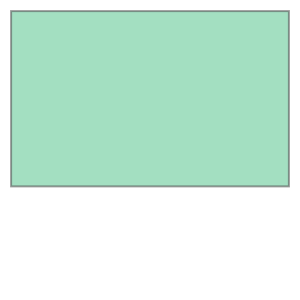

In [8]:
lc_bbox = shapely.geometry.box(*lc.bounds)
lc_bbox

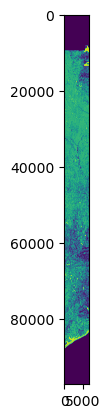

In [9]:
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

left = -100000.0
right = 100000.0
top = 3177435
bottom = 259065.0

with rasterio.open('../data/USFSLand/LCMS_CONUS_v2023-9_Land_Cover_2023.tif') as f:
    rst = f.read(1, window=from_bounds(left, bottom, right, top, f.transform))
    show(rst)

In [10]:
state_nm = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_35_county10.zip")

In [11]:
state_nm.union_all().bounds

(-109.050173, 31.332172, -103.001964, 37.000293)

In [12]:
state_nm.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [14]:
state_nm_proj = state_nm.to_crs(lc.crs)

In [15]:
state_nm_proj.crs

<Projected CRS: PROJCS["Albers_Conical_Equal_Area",GEOGCS["WGS 84" ...>
Name: Albers_Conical_Equal_Area
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
state_nm_proj.union_all().bounds

(-1233582.6827042948,
 991812.7705515743,
 -616758.5623145391,
 1629466.0669907231)

In [23]:
l, b, r, t = state_nm_proj.union_all().bounds

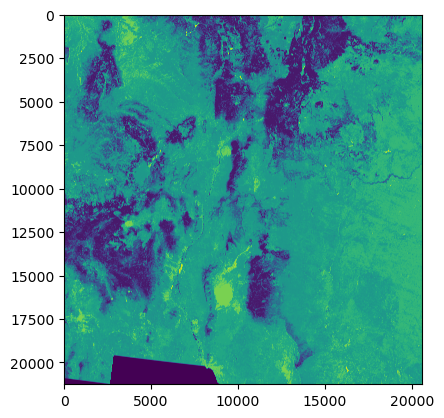

In [24]:
with rasterio.open('../data/USFSLand/LCMS_CONUS_v2023-9_Land_Cover_2023.tif') as f:
    rst = f.read(1, window=from_bounds(l, b, r, t, f.transform))
    show(rst)

In [27]:
lc.units

(None,)